## Decision Trees and Random Forests


## Introduction                

In this task, we explored tree-based models — specifically Decision Trees and Random Forests — to classify whether a person has heart disease using the heart.csv dataset. This dataset contains medical attributes such as age, cholesterol level, resting blood pressure, and more. We began with data preprocessing and then trained a Decision Tree Classifier, visualized the tree, and evaluated its performance. We also built a Random Forest Classifier to compare accuracy, analyzed feature importances, and used cross-validation to assess generalization performance. This task helps understand how tree-based models make decisions and how to control overfitting using tree depth.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [7]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score


In [8]:
x=df.drop("target",axis=1)
y=df["target"]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## Train a Decision Tree Classifier

In [10]:
model=DecisionTreeClassifier()

In [11]:
model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [12]:
y_predict= model.predict(X_test)

In [24]:
dtree_accuracy=accuracy_score(Y_test, y_predict)
print("Decision Tree Accuracy:", dtree_accuracy)
print(classification_report(Y_test, y_predict))

Decision Tree Accuracy: 0.8360655737704918
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



## Visualize the Tree

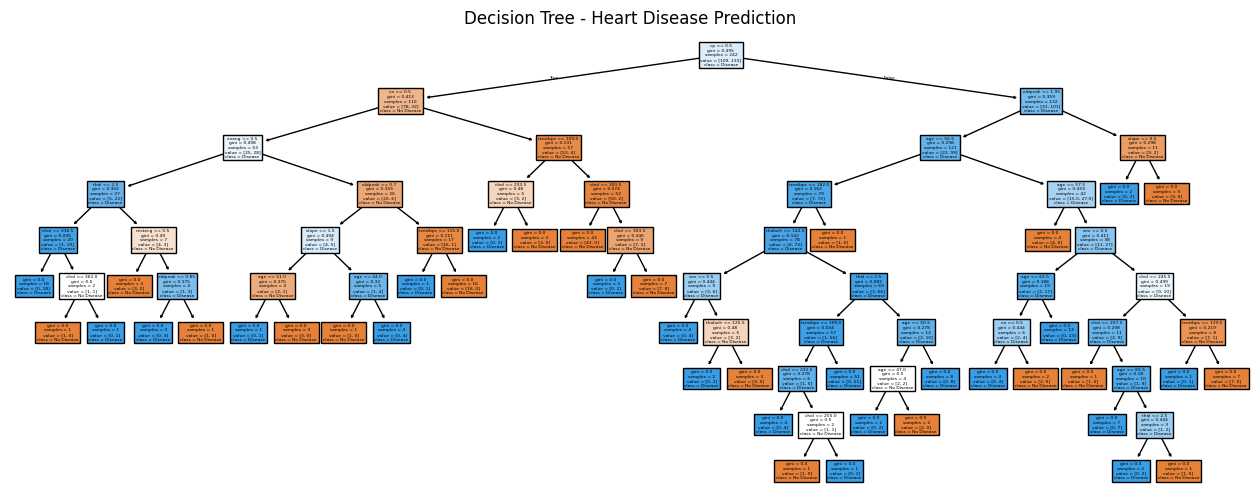

In [18]:
plt.figure(figsize=(16, 6))
plot_tree(model, feature_names=x.columns, class_names=['No Disease', 'Disease'], filled=True)
plt.title("Decision Tree - Heart Disease Prediction")
plt.show()


## Train  Random Forest Classifier

In [29]:
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)
y_pred_rf = rf.predict(X_test)


rf_accuracy = accuracy_score(Y_test, y_pred_rf)
print("Random Forest Accuracy:",rf_accuracy)


Random Forest Accuracy: 0.8524590163934426


## Feature Importance

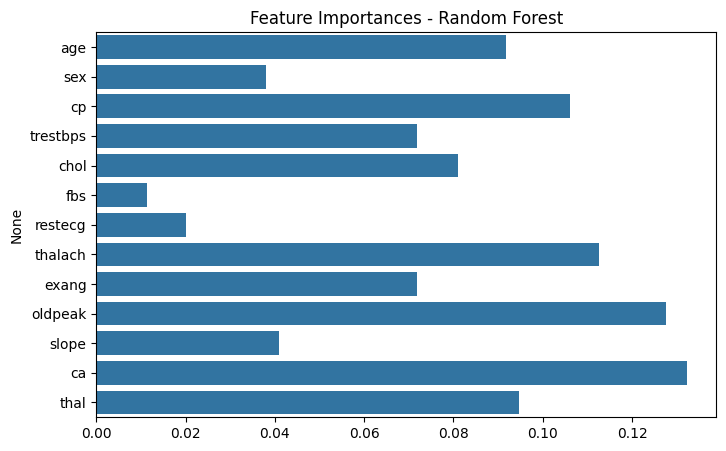

In [30]:
# Feature Importance Plot
importances = rf.feature_importances_
features = x.columns

plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features)
plt.title("Feature Importances - Random Forest")
plt.show()

## Accuracy Comparison

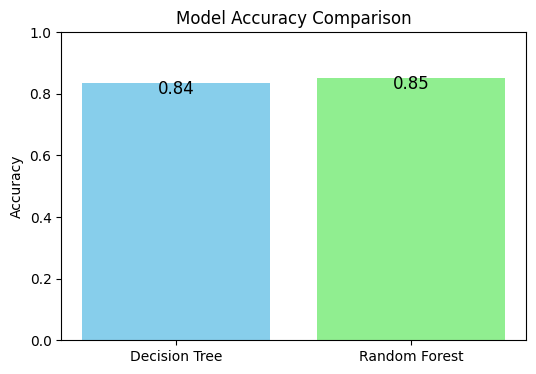

In [31]:
import matplotlib.pyplot as plt

# Model names and corresponding accuracy values
models = ['Decision Tree', 'Random Forest']
accuracies = [dtree_accuracy, rf_accuracy]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)

# Add accuracy labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height - 0.05,
             f'{height:.2f}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()


## Cross-Validation

In [37]:
cv_scores = cross_val_score(rf, x, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))

Cross-validation scores: [0.85245902 0.8852459  0.80327869 0.8        0.76666667]
Mean CV Accuracy: 0.8215300546448088


## Conclusion
Using the heart.csv dataset, we successfully implemented and evaluated Decision Tree and Random Forest classifiers. Both models achieved good accuracy, with the Random Forest performing slightly better due to its ensemble nature. Visualizing the decision tree provided interpretability, while the feature importance plot helped us understand which medical factors most influenced predictions. Additionally, cross-validation confirmed that the models generalized well. This task deepened our understanding of how tree-based models work, how to tune them, and how to interpret their decisions effectively